(874, 1280)


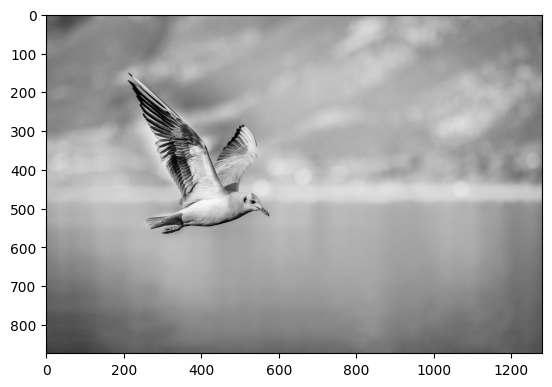

In [3]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("photo/1.jpeg")
GRAY_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(GRAY_img.shape)
plt.imshow(GRAY_img, cmap = 'gray')

In [6]:
f = np.fft.fft2(GRAY_img)
print(f[712] [149])

(1642.6038521194228-16141.448602288372j)


In [7]:
f.shape

(874, 1280)

In [9]:
fshift = np.fft.fftshift(f)
print(fshift[int(f.shape[0] / 2)][int(f.shape[1] / 2)] == f[0][0])

True


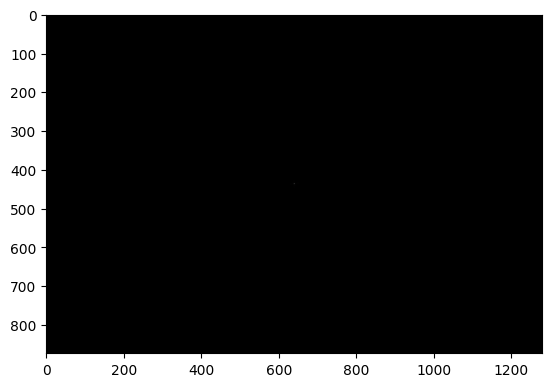

In [10]:
magnitude_spectrum = np.abs(fshift)
plt.imshow(magnitude_spectrum, cmap = 'gray')

In [11]:
print('min:', np.min(magnitude_spectrum), 'max:', np.max(magnitude_spectrum))
print(magnitude_spectrum[int(f.shape[0] / 2)][int(f.shape[1] / 2)])

min: 2.9384981004474837 max: 176808943.0
176808943.0


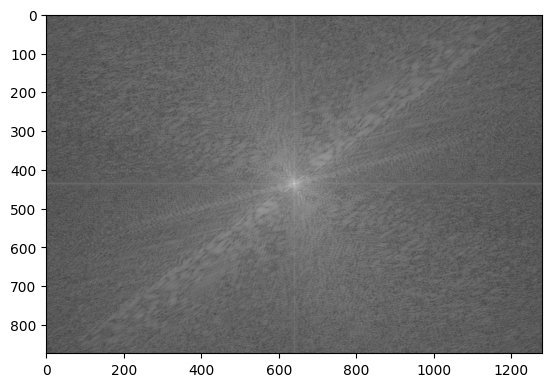

In [12]:
magnitude_spectrum = np.log(1+np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap = 'gray')

In [13]:
min = np.min(magnitude_spectrum)
max = np.max(magnitude_spectrum)
print(f"max - min = {max-min}")
print(magnitude_spectrum[int(f.shape[0] / 2)][int(f.shape[1] / 2)])

max - min = 17.619780837265992
18.99058029512357


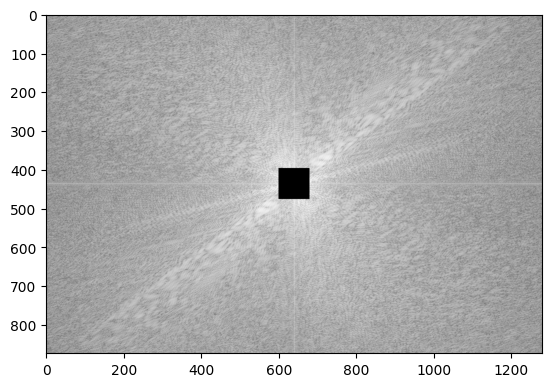

In [14]:
fshift[int(f.shape[0] / 2) -  40 : int(f.shape[0] / 2) + 40, int(f.shape[1] / 2)-40 : int(f.shape[1] / 2) + 40] = 0
fshift[int(f.shape[0] / 2)][int(f.shape[1] / 2)] = 0
print()
magnitude_spectrum = np.log(1+np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap = 'gray')

In [15]:
f_ishift = np.fft.ifftshift(fshift)
# Compute the 2-dimensional inverse discrete Fourier Transform.
img_back = np.fft.ifft2(f_ishift)
print(img_back[626][406])

(-4.136565330026501+1.0035503792308034j)


In [17]:
np.sqrt((-4.136565330026501)**2 + 1.0035503792308034**2)

4.256558010086501

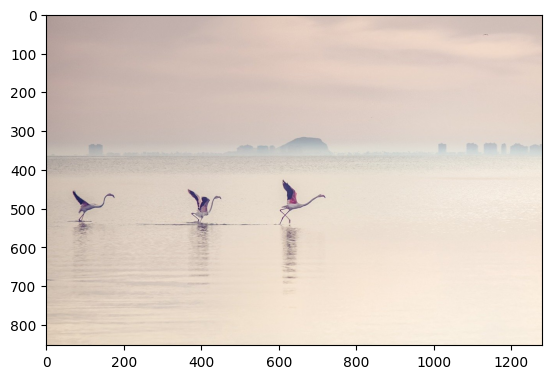

In [18]:
img = cv2.imread('photo/2.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap='gray')


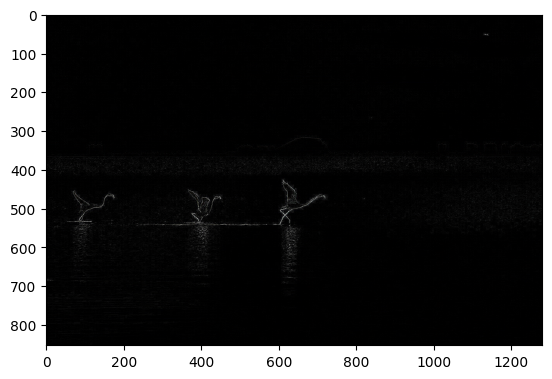

In [19]:
# defind edge of image with operator Laplace
laplacian = cv2.Laplacian(img, -1)
plt.imshow(laplacian)

In [20]:
np.sum(laplacian)

7553489

In [21]:
img.shape

(853, 1280, 3)

(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

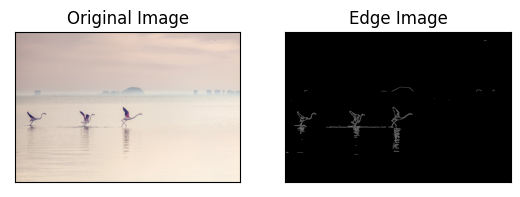

In [22]:
canny = cv2.Canny(img, 100, 200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(canny,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

In [24]:
np.sum(canny)

1429020